# 05 - Measures of Central Tendency

Three ways to describe the "middle" or "typical" value in data:

- **Mean:** Average (add all values, divide by count)
- **Median:** Middle value when sorted
- **Mode:** Most common value

**Key Idea:** Each tells a different story. Mean is sensitive to outliers, median is robust, mode works for categories.

**When to use which:**
- Mean: Symmetric data without extreme outliers
- Median: Skewed data (like salaries)
- Mode: Categorical data (most popular color, size)

## Simple Example: Salary Data with One Billionaire

Five employees: four typical workers and one CEO making millions.

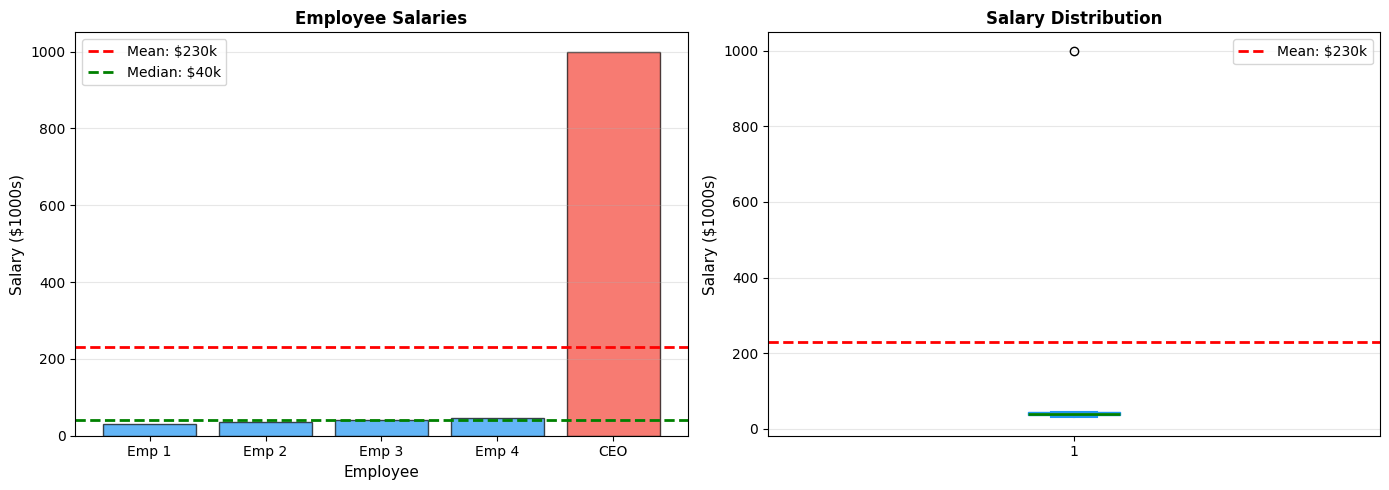


Salaries: $30k, $35k, $40k, $45k, $1,000k

Mean: $230k → Misleading! Pulled up by CEO
Median: $40k → More typical of most employees

→ The median better represents the 'typical' salary here


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Salaries (in thousands)
salaries = np.array([30, 35, 40, 45, 1000])  # Last one is CEO

# Calculate measures
mean_salary = np.mean(salaries)
median_salary = np.median(salaries)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart of salaries
ax1.bar(range(len(salaries)), salaries, color=['#2196F3']*4 + ['#F44336'], alpha=0.7, edgecolor='black')
ax1.axhline(mean_salary, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_salary:.0f}k')
ax1.axhline(median_salary, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_salary:.0f}k')
ax1.set_xlabel('Employee', fontsize=11)
ax1.set_ylabel('Salary ($1000s)', fontsize=11)
ax1.set_title('Employee Salaries', fontsize=12, fontweight='bold')
ax1.set_xticks(range(len(salaries)))
ax1.set_xticklabels(['Emp 1', 'Emp 2', 'Emp 3', 'Emp 4', 'CEO'])
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Box plot showing spread
ax2.boxplot(salaries, vert=True, patch_artist=True,
            boxprops=dict(facecolor='#BBDEFB', color='#2196F3'),
            medianprops=dict(color='green', linewidth=2),
            whiskerprops=dict(color='#2196F3', linewidth=1.5),
            capprops=dict(color='#2196F3', linewidth=1.5))
ax2.axhline(mean_salary, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_salary:.0f}k')
ax2.set_ylabel('Salary ($1000s)', fontsize=11)
ax2.set_title('Salary Distribution', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nSalaries: $30k, $35k, $40k, $45k, $1,000k")
print(f"\nMean: ${mean_salary:.0f}k → Misleading! Pulled up by CEO")
print(f"Median: ${median_salary:.0f}k → More typical of most employees")
print(f"\n→ The median better represents the 'typical' salary here")

## Real-World Example: E-Commerce Order Values

An online store analyzes order sizes. Most orders are small, but a few large corporate orders skew the data.

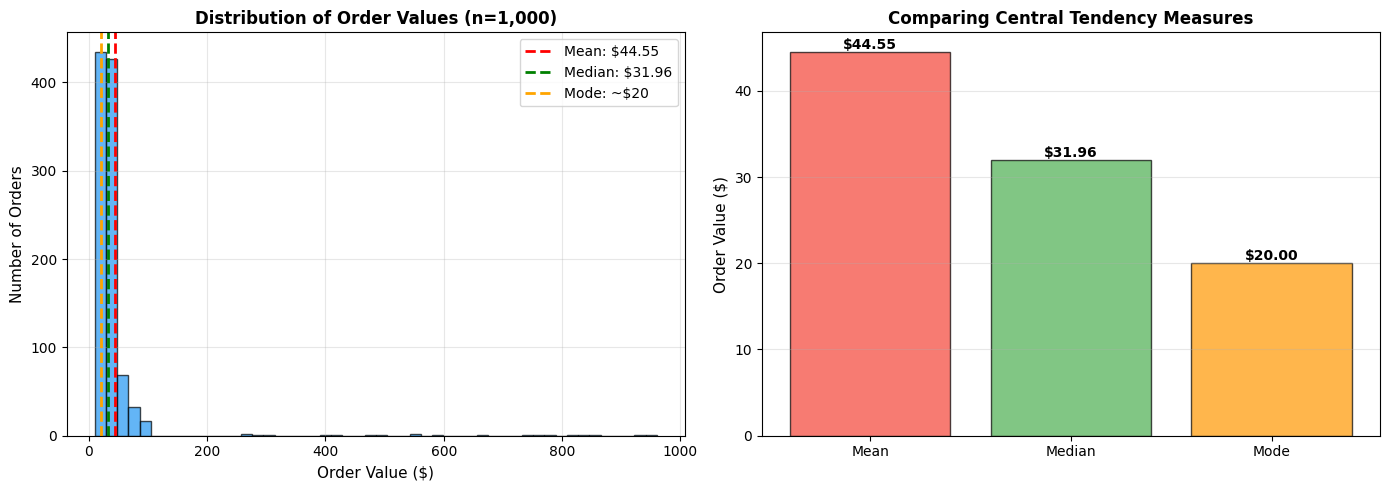


📊 Order Value Summary:
   Mean: $44.55 → Inflated by large corporate orders
   Median: $31.96 → Better represents typical customer
   Mode: ~$20 → Most common order size

💡 Business Insights:
   → Use MEDIAN for typical customer behavior (inventory planning)
   → Use MEAN for revenue projections (includes all orders)
   → Use MODE for most common customer segment (marketing focus)

📈 Data characteristics:
   → Right-skewed distribution (long tail of high values)
   → 20 orders (2%) pull mean up by $12.59


In [2]:
# Simulate 1000 e-commerce orders
np.random.seed(42)

# Most orders: $10-50 (typical customers)
typical_orders = np.random.uniform(10, 50, 900)

# Some medium orders: $50-100
medium_orders = np.random.uniform(50, 100, 80)

# Few large corporate orders: $200-1000
large_orders = np.random.uniform(200, 1000, 20)

all_orders = np.concatenate([typical_orders, medium_orders, large_orders])

# Calculate measures
mean_order = np.mean(all_orders)
median_order = np.median(all_orders)
mode_order = stats.mode(np.round(all_orders, -1), keepdims=True).mode[0]  # Round to nearest $10

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1.hist(all_orders, bins=50, color='#2196F3', alpha=0.7, edgecolor='black')
ax1.axvline(mean_order, color='red', linestyle='--', linewidth=2, label=f'Mean: ${mean_order:.2f}')
ax1.axvline(median_order, color='green', linestyle='--', linewidth=2, label=f'Median: ${median_order:.2f}')
ax1.axvline(mode_order, color='orange', linestyle='--', linewidth=2, label=f'Mode: ~${mode_order:.0f}')
ax1.set_xlabel('Order Value ($)', fontsize=11)
ax1.set_ylabel('Number of Orders', fontsize=11)
ax1.set_title('Distribution of Order Values (n=1,000)', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Comparison table as bar chart
measures = ['Mean', 'Median', 'Mode']
values = [mean_order, median_order, mode_order]
colors = ['#F44336', '#4CAF50', '#FF9800']

bars = ax2.bar(measures, values, color=colors, alpha=0.7, edgecolor='black')
ax2.set_ylabel('Order Value ($)', fontsize=11)
ax2.set_title('Comparing Central Tendency Measures', fontsize=12, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, val in zip(bars, values):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
            f'${val:.2f}',
            ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 Order Value Summary:")
print(f"   Mean: ${mean_order:.2f} → Inflated by large corporate orders")
print(f"   Median: ${median_order:.2f} → Better represents typical customer")
print(f"   Mode: ~${mode_order:.0f} → Most common order size")

print("\n💡 Business Insights:")
print("   → Use MEDIAN for typical customer behavior (inventory planning)")
print("   → Use MEAN for revenue projections (includes all orders)")
print("   → Use MODE for most common customer segment (marketing focus)")

print(f"\n📈 Data characteristics:")
print(f"   → Right-skewed distribution (long tail of high values)")
print(f"   → {len(large_orders)} orders ({len(large_orders)/len(all_orders)*100:.0f}%) pull mean up by ${mean_order - median_order:.2f}")

## Summary: Choosing the Right Measure

| Measure | Best For | Weakness |
|---------|----------|----------|
| **Mean** | Symmetric data, revenue totals | Very sensitive to outliers |
| **Median** | Skewed data, salaries, housing prices | Ignores extreme values |
| **Mode** | Categorical data, most popular item | May not be unique or useful |

### Real-World Applications
- **Housing prices:** Use median (a few mansions shouldn't skew typical home price)
- **Product reviews:** Use mode (most common rating: 5 stars)
- **Revenue forecasting:** Use mean (need to include all sales, even big ones)
- **Employee salaries:** Use median (fairer representation of typical worker)

**Pro tip:** Always report multiple measures to get the full picture!